# Yahoo Finance Data DL

* Download historical data for analysis (raw)

## Install deps

In [32]:
%pip install "yfinance[optional]"=="0.2.37"

Note: you may need to restart the kernel to use updated packages.


## DL

* HG=F - Copper

In [33]:
import yfinance as yf

hg_f = yf.Ticker("HG=F")

In [34]:
# get all stock info
hg_f.info

{'maxAge': 86400,
 'priceHint': 4,
 'previousClose': 3.926,
 'open': 3.9255,
 'dayLow': 3.8815,
 'dayHigh': 3.9465,
 'regularMarketPreviousClose': 3.926,
 'regularMarketOpen': 3.9255,
 'regularMarketDayLow': 3.8815,
 'regularMarketDayHigh': 3.9465,
 'volume': 80624,
 'regularMarketVolume': 80624,
 'averageVolume': 1088,
 'averageVolume10days': 4041,
 'averageDailyVolume10Day': 4041,
 'bid': 3.8905,
 'ask': 3.8915,
 'bidSize': 800,
 'askSize': 1200,
 'expireDate': 1716940800,
 'openInterest': 126184,
 'fiftyTwoWeekLow': 3.53,
 'fiftyTwoWeekHigh': 4.1895,
 'fiftyDayAverage': 3.81898,
 'twoHundredDayAverage': 3.7641976,
 'currency': 'USD',
 'exchange': 'CMX',
 'quoteType': 'FUTURE',
 'symbol': 'HGK24.CMX',
 'underlyingSymbol': 'HG=F',
 'shortName': 'Copper May 24',
 'firstTradeDateEpochUtc': 967608000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '02846b86-92eb-33ab-a801-f9b43107619f',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegRatio': None}

In [43]:
import pandas as pd
import numpy as np

# get historical market data
hist = hg_f.history(period="1y")

# Replace 0 values with NaN in specific columns
hist.replace({'Volume': {0: pd.NA}, 'Open': {0: pd.NA}}, inplace=True)
hist.replace(0, np.nan, inplace=True)  # Replace 0 with NaN

# Drop rows with NaN values in these specific columns
hist.dropna(subset=['Volume', 'Open'], inplace=True)

hist


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-09 00:00:00-05:00,4.0465,4.0565,4.0300,4.0545,584,NaN,NaN
2023-03-10 00:00:00-05:00,4.0120,4.0675,3.9900,4.0455,591,NaN,NaN
2023-03-13 00:00:00-04:00,4.0230,4.0800,3.9460,4.0695,842,NaN,NaN
2023-03-14 00:00:00-04:00,4.0395,4.0620,4.0010,4.0105,923,NaN,NaN
2023-03-15 00:00:00-04:00,4.0210,4.0210,3.8565,3.8565,875,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,3.8450,3.8815,3.8435,3.8520,1136,NaN,NaN
2024-03-05 00:00:00-05:00,3.8465,3.8630,3.8380,3.8440,929,NaN,NaN
2024-03-06 00:00:00-05:00,3.8400,3.8915,3.8375,3.8705,987,NaN,NaN


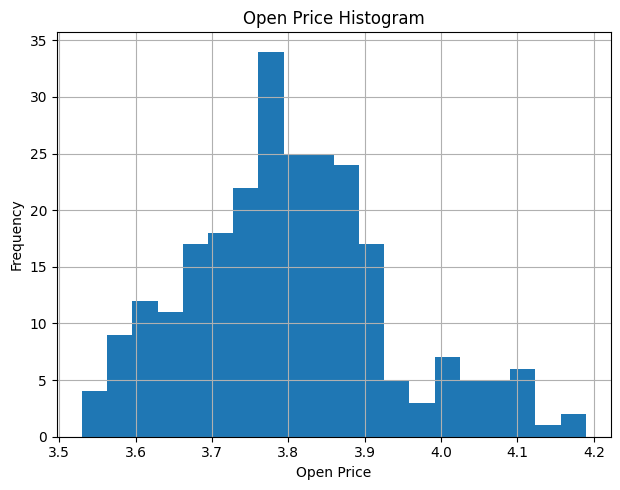

In [45]:
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 5))



# Plotting Open
plt.subplot(1, 2, 2)
hist['Open'].hist(bins=20)
plt.title('Open Price Histogram')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

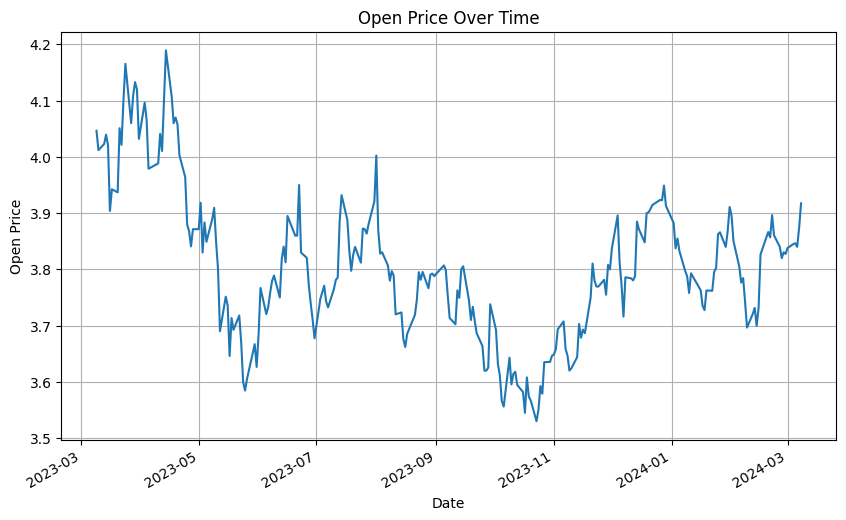

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Plotting the 'Open' price as a line plot
plt.figure(figsize=(10, 6))
hist['Open'].plot(kind='line', title='Open Price Over Time', xlabel='Date', ylabel='Open Price')
plt.grid(True)
plt.show()


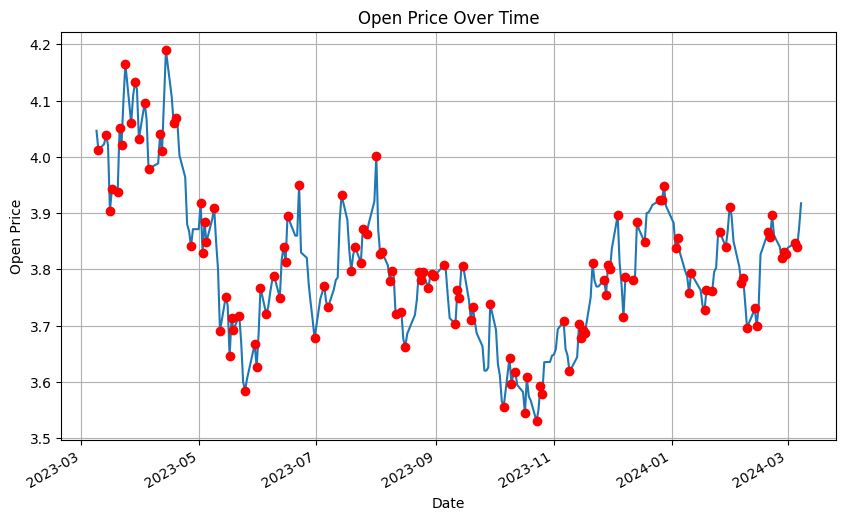

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'hist' is your DataFrame with 'Date' set as the index and non-zero 'Open' values

# Calculate daily change in 'Open' prices
hist['OpenChange'] = hist['Open'].diff()

# Find points where the change in 'Open' price shifts direction
# This is a simple way to spot potential trend changes
trend_changes = hist['OpenChange'] * hist['OpenChange'].shift(-1) < 0

# Plotting the 'Open' price as a line plot
plt.figure(figsize=(10, 6))
hist['Open'].plot(kind='line', title='Open Price Over Time', xlabel='Date', ylabel='Open Price')
plt.grid(True)

# Marking trend changes
for date, change in trend_changes.items():
    if change:
        plt.plot(date, hist.loc[date, 'Open'], 'ro')  # Mark with red circle

plt.show()


In [30]:
# show meta information about the history (requires history() to be called first)
hg_f.history_metadata

{'currency': 'USD',
 'symbol': 'HG=F',
 'exchangeName': 'CMX',
 'instrumentType': 'FUTURE',
 'firstTradeDate': 967608000,
 'regularMarketTime': 1709935198,
 'hasPrePostMarketData': False,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 3.891,
 'chartPreviousClose': 4.042,
 'priceHint': 4,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1709874000,
   'end': 1709874000,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1709874000,
   'end': 1709960340,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1709960340,
   'end': 1709960340,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '1y',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [16]:
# show actions (dividends, splits, capital gains)
hg_f.actions
hg_f.dividends
hg_f.splits
hg_f.capital_gains  # only for mutual funds & etfs


Series([], dtype: object)

In [18]:
# show share count
hg_f.get_shares_full(start="2022-01-01", end=None)


yfinance.Ticker object <HG=F>

In [20]:
hg_f.income_stmt
hg_f.quarterly_income_stmt

""


In [21]:
# - balance sheet
hg_f.balance_sheet
hg_f.quarterly_balance_sheet

""


In [22]:
# - cash flow statement
hg_f.cashflow
hg_f.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

""


In [23]:

# show holders
hg_f.major_holders
hg_f.institutional_holders
hg_f.mutualfund_holders
hg_f.insider_transactions
hg_f.insider_purchases
hg_f.insider_roster_holders


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/?modules=institutionOwnership%2CfundOwnership%2CmajorDirectHolders%2CmajorHoldersBreakdown%2CinsiderTransactions%2CinsiderHolders%2CnetSharePurchaseActivity&corsDomain=finance.yahoo.com&symbol=HG%3DF&formatted=false&crumb=kY9MYXZrrjV


""


In [24]:
# show recommendations
hg_f.recommendations
hg_f.recommendations_summary
hg_f.upgrades_downgrades


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HG=F?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=HG%3DF&crumb=kY9MYXZrrjV
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HG=F?modules=upgradeDowngradeHistory&corsDomain=finance.yahoo.com&formatted=false&symbol=HG%3DF&crumb=kY9MYXZrrjV


""


In [25]:

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
hg_f.earnings_dates

HG=F: No earnings dates found, symbol may be delisted


In [26]:

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
hg_f.isin

'-'

In [27]:

# show options expirations
hg_f.options


()

In [28]:
# show news
hg_f.news

[{'uuid': 'a081de49-3834-35d7-9b1a-49ae61a24622',
  'title': 'EMERGING MARKETS-Latam stocks advance, weak copper prices drag currencies of Chile, Peru',
  'publisher': 'Reuters',
  'link': 'https://finance.yahoo.com/news/emerging-markets-latam-stocks-advance-153434824.html',
  'providerPublishTime': 1706283274,
  'type': 'STORY',
  'relatedTickers': ['HG=F', '^BVSP', '^MXX']},
 {'uuid': '08c6cfc7-1146-374c-bf8f-8f02328cc4b1',
  'title': 'CANADA STOCKS-TSX futures edge up on higher gold prices; US data in focus',
  'publisher': 'Reuters',
  'link': 'https://finance.yahoo.com/news/canada-stocks-tsx-futures-edge-123846632.html',
  'providerPublishTime': 1706272726,
  'type': 'STORY',
  'relatedTickers': ['GC=F', 'ZG=F', 'HG=F', '^GSPC']},
 {'uuid': '1666725e-a880-3220-be81-4b39be02d706',
  'title': 'These Are the 4 Best Silver Coin Types To Buy in Order To Turn a Profit',
  'publisher': 'GOBankingRates',
  'link': 'https://finance.yahoo.com/news/4-best-silver-coin-types-123010528.html',
 

In [29]:
# get option chain for specific expiration
opt = hg_f.option_chain('2024-06-21')
# data available via: opt.calls, opt.puts


ValueError: Expiration `2024-06-21` cannot be found. Available expirations are: []